In [1]:
pip install artpop

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

# Project import
import artpop

In [3]:
# artpop's matplotlib style
plt.style.use(artpop.mpl_style)
log_ages = artpop.MISTIsochrone._log_age_grid[40:-3]

# use this random state for reproducibility
rng = np.random.RandomState(112)

In [4]:
ssp_old = artpop.MISTSSP(
    log_age = 10.1,          # log of age in years
    feh = -1.5,             # metallicity [Fe/H]
    phot_system = 'UBVRIplus', # photometric system(s)
    num_stars = 5e9,      # number of stars
    random_state = rng,   # random state for reproducibility
    ab_or_vega='vega',
    mag_limit=-2,
    mag_limit_band='Bessell_V'
)

In [6]:
ssp_old2 = artpop.MISTSSP(
    log_age = 10.1,          # log of age in years
    feh = -1.5,             # metallicity [Fe/H]
    phot_system = 'UBVRIplus', # photometric system(s)
    num_stars = 5e6,      # number of stars
    random_state = rng,   # random state for reproducibility
    ab_or_vega='vega',
)

In [7]:
pAGB_o = ssp_old.select_phase('postAGB')
pAGB_o2 = ssp_old2.select_phase('postAGB')

In [8]:
i_o = ssp_old.star_mags('Bessell_B')
g_o = ssp_old.star_mags('Bessell_V')
i_o2 = ssp_old2.star_mags('Bessell_B')
g_o2 = ssp_old2.star_mags('Bessell_V')


Text(0, 0.5, 'M$_i$')

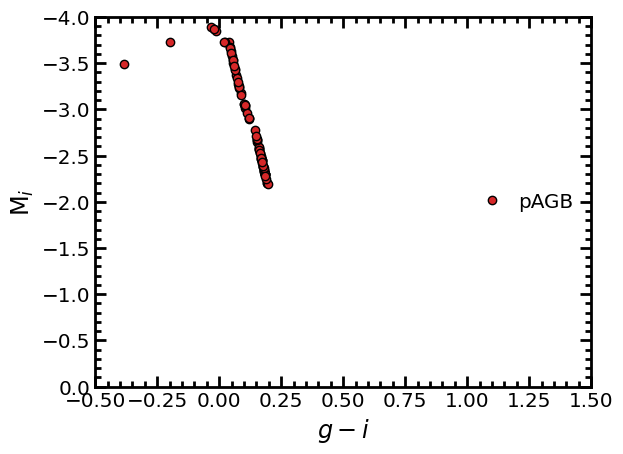

In [9]:
plt.plot(g_o[pAGB_o] - i_o[pAGB_o], i_o[pAGB_o], 'o',
c='tab:red', mec='k', label='pAGB')
plt.legend(loc='center right')
plt.xlim(-0.5,1.5)
plt.ylim(-4,0)
plt.minorticks_on()
plt.gca().invert_yaxis()
plt.xlabel(r'$g-i$')
plt.ylabel(r'M$_i$')

In [10]:
def find_average_of_top_3_lowest(arr):
    # Combine the index and values into a 2D array
    points = np.column_stack((np.arange(len(arr)), arr))
    
    # Sort points based on values in ascending order
    sorted_points = points[points[:, 1].argsort()]
    
    # Select the top 5 lowest values
    top_10_lowest_points = sorted_points[:5]
    
    # Calculate and return the average value of the selected points
    average_value = np.mean(top_10_lowest_points[:, 1])
    
    return average_value

In [11]:
# Use the function
average_of_top_3_lowest = find_average_of_top_3_lowest(i_o[pAGB_o])

# Print or use the average_of_top_10_lowest value as needed
print("Average of the top 3 lowest values (int):", average_of_top_3_lowest)

Average of the top 3 lowest values (int): -3.841203920477971
